# A Brief Tutorial on OpenCV & MeshLab

Xiaohan Fei


`feixh@cs.ucla.edu`

Github repository of this tutorial:

https://github.com/feixh/opencv_tut

The core OpenCV library is written in C++, but it has several language bindings, including Python & Java. For simplicity, we will use OpenCV in Python.

MeshLab is a software which makes it easy to manipulate mesh data, which is how 3D models are stored usually.

## OpenCV I/O functionality


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

The above piece of code imported all the packages we need through this tutorial.

### Load, display and save images
Use the function [`cv2.imread()`](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imread#cv2.imread) to read an image. The function accepts two arguments, the first argument is the path of the image and the second argument is a flag indicating how to decode the image, there are three options:
- `cv2.IMREAD_COLOR`: load the image in color mode
- `cv2.IMREAD_GRAYSCALE`: load the image in grayscale mode
- `cv2.IMREAD_UNCHANGED`: load the image in color+alpha mode if the image has an alpha (controls transparency) channel, otherwise in color mode

Use the function [`cv2.imshow()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=imshow#cv2.imshow) to display an image. This function accepts two arguments, the first argument is the window name and the second one is the image, which is an numpy array.

In [ ]:
# load the image
image = cv2.imread('dog.png', cv2.IMREAD_COLOR)
# TODO: check size of images loaded with different options
print image.shape

In [ ]:
# display the image
cv2.imshow('display', image)

Running the code above doesn't show us the image, we need to run the "event loop" and go into the display thread by calling [`cv2.waitKey()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=waitkey#waitkey). You can either give this function an integer argument, which is the amount of time to wait (in milliseconds) or leave out the argument, which means the display thread will wait forever until you press a key. The value returned is the ASCII code of the key you pressed. We can use this to wait for a specific key stroke and manipulate the image in different ways according to the key pressed.

In [ ]:
# press any key to close the window
cv2.waitKey()
# close the window
cv2.destroyWindow('display')

**Example**

Wait for a specific key, say 'x'.

In [ ]:
image = cv2.imread('dog.png', cv2.IMREAD_UNCHANGED)
key = None
while key != ord('x'):
    cv2.imshow('display', image)
    # wait for 30 ms
    key = cv2.waitKey(30)
# close the window
cv2.destroyWindow('display')

**Example** 

Do different things to the image according to the key pressed.
- 'v': flip the image vertically
- 'h': flip the image horizontally
- 'u': upsample the image by a factor of 2
- 'd': downsample the image by a factor of 2
- 'r': show the red channel of the image
- 'g': show the green channel of the image
- 'b': show the blue channel of the image
- 's': save the modified image

In [ ]:
image = cv2.imread('dog.png', cv2.IMREAD_UNCHANGED)
key = None
while key != ord('x'):
    cv2.imshow('original', image)
    if key == ord('v'):
        image_new = np.flipud(image)
        cv2.imshow('modified', image_new)
    elif key == ord('h'):
        image_new = np.fliplr(image)
        cv2.imshow('modified', image_new)
    elif key == ord('u'):
        # resize the input image to desired size
        # 1st arg: image
        # 2nd arg: desired size
        # 3rd arg: interpolation method, default is bilinear
        image_new = cv2.resize(image, 
                           dsize=(1024, 1024), 
                           interpolation=cv2.INTER_LINEAR)
        cv2.imshow('modified', image_new)
    elif key == ord('d'):
        image_new = cv2.resize(image, 
                           (256, 256),
                          interpolation=cv2.INTER_LINEAR)
        cv2.imshow('modified', image_new)   
    elif key == ord('r'):
        image_new = image.copy()
        image_new[..., [0,1]] = 0
        cv2.imshow('modified', image_new)
    elif key == ord('g'):
        image_new = image.copy()
        image_new[..., [0,2]] = 0
        cv2.imshow('modified', image_new)
    elif key == ord('b'):
        image_new = image.copy()
        image_new[..., [1,2]] = 0
        cv2.imshow('modified', image_new)
    elif key == ord('s'):
        # save the image to a given path
        # 1st arg: desired image path
        # 2nd arg: image data
        cv2.imwrite('dog_new.png', image_new)                
    # wait for 30 ms
    key = cv2.waitKey(30)
# close all window
cv2.destroyAllWindows()

In [ ]:
import cv2
image = cv2.imread('dog.png')
print image.dtype

**useful functions**
- [`cv2.imread()`](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imread#cv2.imread)
- [`cv2.imshow()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=imshow#cv2.imshow)
- [`cv2.imwrite()`](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imwrite#cv2.imwrite)
- [`cv2.waitKey()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=waitkey#waitkey)
- [`cv2.resize()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=resize#cv2.resize)
- More on [reading & writing images](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/imgcodecs.html)
- More on [geometric image transformations]( http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html)

### Use webcam to capture a video
The [`VideoCapture`](http://docs.opencv.org/3.0-beta/modules/videoio/doc/reading_and_writing_video.html?highlight=videocapture#videocapture) class provides funcationaly for video capturing from video files, image sequences or cameras. We can create a `VideoCapture` object by one of the following arguments:
- a string pointing to a video file
- an integer which is the device number of a camera
- leave it empty and assign videos/cameras later

**Create `VideoCapture` object**

Create a `VideoCapture` object and attach it to the webcam.

In [ ]:
# Create an object which can capture images.
cap = cv2.VideoCapture()
# Camera devices are indexed by integers, 
# typically your laptop webcam has device number 0.
# Do a small loop to find the proper camera and open it.
for i in range(10):
    if cap.open(i):
        print 'camera {} launched'.format(i)
        break

**Read images**

Once a `VideoCapture` object has been created and linked to videos/cameras, we can read images from it. By calling `VideoCapture::read()`, which returns a tuple of status and the actual image. A `False` status means failure in reading images. If `VideoCapture` successfully read in an image, we could display the image as usual using `cv2.imshow()`.

In [ ]:
key = None
while key != ord('x'):
    status, image = cap.read()
    assert status, 'failed to read image from camera'
    cv2.imshow('display', image)
    key = cv2.waitKey(30)
cv2.destroyWindow('display')

**Release resources**

Once done with the camera, we need to release the resource.

In [ ]:
# release the camera
cap.release()

**Example**

Read and show a recorded video from the files ystem.

In [ ]:
import cv2
# Create an object with a filename pointing to a video.
cap = cv2.VideoCapture('Megamind.avi')
key = None
while key != ord('x'):
    status, image = cap.read()
    if not status:
        print 'end of video'
        break
    cv2.imshow('display', image)
    key = cv2.waitKey(30)
cv2.destroyWindow('display')
cap.release()

The above code shows a minimal video player implemented in python with OpenCV. A lot of features are missing, such as pause, speed up/down the video, etc. One can do these by attach a track bar to the window. More information can be found in the [high-level gui (highgui) package](http://docs.opencv.org/3.0-beta/modules/highgui/doc/highgui.html).

### Application: Face detection in a video
OpenCV provides a basic face classifier on top of which we can build a simple face detection app.

In [ ]:
import cv2
# Create a cascade face detector.
configure_file = 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(configure_file)
# let's load the lena image
image = cv2.imread('lena.jpg')

# The face detector takes a gray scale image as input,
# so we need to convert the color image to grayscale image first.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces in multi-scale.
faces = face_detector.detectMultiScale(gray, 1.1, 2)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0), 2)
cv2.imshow('display', image)
cv2.waitKey()
cv2.destroyWindow('display')

**Functions explained**

- [`cv2.rectangle()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#rectangle): draw a rectangle on the given image (1st argument). Need to specify the top-left & bottom-right corners of the rectangle (2nd & 3rd argument, a tuple), RGB color of the rectangle border (4th argument) and width of border (5th argument).
- Other useful drawing functions include
[`cv2.circle()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#circle)(draw circles), 
[`cv2.line()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#line)(draw straight lines)
and [`cv2.putText()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#puttext)(overlay texts on image).
- More on [drawing functions](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#).

**Example**

Simplistic Face Swap

In [ ]:
import cv2
import numpy as np


def overlay_image(foreground, background, rect):
    """
    overlay the foreground image on the background image
    at the specified location
    :param foreground: the foreground image, numpy array
    :param background: the background image, numpy array
    :param rect: a rectangle indicating where to overlay
    :return: overlaid image
    """
    row, col = foreground.shape[0:2]
    x, y, w, h = rect
    xc, yc = x + w/2, y + h/2
    ratio_x, ratio_y = w/float(col), h/float(row)
    ratio = max(ratio_x, ratio_y)
    row, col = int(ratio*row) & 0xfffe, int(ratio*col) & 0xfffe
    resized = cv2.resize(foreground, dsize=(col, row))
    ret = background.copy()
    ymin = max(yc-row/2, 0)
    ymax = min(yc+row/2, ret.shape[0])
    xmin = max(xc-col/2, 0)
    xmax = min(xc+col/2, ret.shape[1])
    size_x, size_y = xmax-xmin, ymax-ymin
    xo, yo = xmin-(xc-col/2), ymin-(yc-row/2)
    # Copy resized foreground image to background.
    ret[ymin:ymax, xmin:xmax, :] = resized[yo:size_y, xo:size_x, :]
    return ret

if __name__ == '__main__':
    face = cv2.imread('smiling_face.jpg')
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    cap = cv2.VideoCapture()
    for i in range(10):
        if cap.open(i):
            print 'camera {} launched'.format(i)
            break
    key = None
    face_location = None
    while key != ord('x'):
        status, image = cap.read()
        assert status, 'failed to grab image from camera'
        # convert color image to grayscale image
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, 1.2, 4)
        if len(faces) != 1:
            # use the previous detection result
            pass
        else:
            face_location = faces[0]
        # Potential improvement: we can use filtering techniques (Kalman, particle, etc.) to 
        # smooth detection results, i.e., instead of throwing away previous detection results, 
        # we can re-use them along with the current detection 
        # and stablize the overall detection performance.
        if face_location is not None:
            image = overlay_image(foreground=face, background=image, rect=face_location)
        cv2.imshow('display', image)
        key = cv2.waitKey(30)
    cv2.destroyWindow('display')
    cap.release()

## Feature detection & matching/tracking
Most SLAM (Simultaneous Localization and Mapping) systems rely on *sparse feature points*. A SLAM system takes a sequence of images and possibly measurements from other sensors, such as an IMU (Inertial Measurement Unit), as inputs and spits out the trajectory of the sensor platform as well as the 3D structure of the environment. The following video demonstrates the visual inertial SLAM system developled at UCLA Vision Lab.

In [ ]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=7, seconds=29).total_seconds())

YouTubeVideo("H7mODetStyo", start=start, width=560, height=315)

There are also some *direct* SLAM systems which don't rely on sparse feature points. To obtain the camera pose and depth estimation, they minimize the photometric error of *every possible pixel* instead of the small set of feature points which are carefully selected by the feature detector. 

The following video demonstrates an open source direct SLAM system, which is dubbed as [*LSD-SLAM*](https://github.com/tum-vision/lsd_slam).

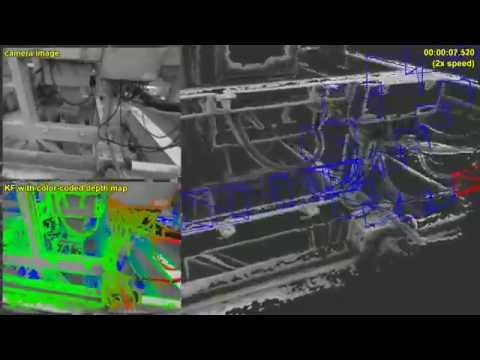

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("GnuQzP3gty4", width=560, height=315)

Today we will focus on sparse feature based SLAM. 

Typical pipeline of a sparse feature based SLAM system includes: 
- Sparse feature detection: detect salient feature points in the image
- Feature tracking/matching: establish correspondences between feature points across consecutive frames, either by tracking or matching
- Camera pose estimation: compute the camera pose according to the feature correspondences
- Triangulation: estimate depth of a feature point in 3D

We will focus on *Sparse feature detection* and *tracking/matching* today. You can find more about camera pose estimation & triangulation in the [book](http://vision.ucla.edu/MASKS/) and also the [OpenCV reference manual on 3D vision](http://docs.opencv.org/3.0-beta/modules/calib3d/doc/calib3d.html).

**Feature**

Features are image regions which are discriminative enough to be found. They can be points, lines or regions. In the image below, if you look at the homogeneous regions, it's hard to distinguish one region from the other. If you look at the texture-rich regions, such as the texts or the picture on the box, there are more details on which you can depend to distinguish them.

![](box.png)

OpenCV provides a very rich set of functions to detect different kinds of features, such as 
[FAST](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_fast/py_fast.html), 
[Harris](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html), 
[SIFT](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html), etc. Today we will focus on FAST corner detector, which is very popular in robotic applications.

Essentially, FAST solves a binary classification problem: given a pixel, it tells us whether that pixel is a corner or not. The basic idea is to test whether a small set of pixels sampled around the target pixel follows a specific pattern. The pattern is learned from a training set offline.

**Example**

Fast corner detection

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# read the box image
img = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)

# Create a FAST corner detector with default parameters,
# the interface is consistent across all the detectors, just replace 'FAST'.
detector = cv2.FeatureDetector_create('FAST')
detector.setInt('threshold', 50)
# find and draw the keypoints
kp1 = detector.detect(img)
img1 = cv2.drawKeypoints(img, kp1, color=(255,0,0))

# visualize
plt.subplot(121)
plt.imshow(img1)
plt.axis('off')
plt.title('thresh={}; non-max={}; #pts={}'.format(
    detector.getInt('threshold'), 
    detector.getBool('nonmaxSuppression'), 
    len(kp1)))

# print parameters
print 'threshold=', detector.getInt('threshold')
print 'non-maximum suppression', detector.getBool('nonmaxSuppression')

# set parameters
detector.setBool('nonmaxSuppression', False)
# detector.setInt('threshold', 50)
kp2 = detector.detect(img)
img2 = cv2.drawKeypoints(img, kp2, color=(0, 255, 0))

# visualize
plt.subplot(122)
plt.imshow(img2)
plt.axis('off')
plt.title('thresh={}; non-max={}, #pts={}'.format(
    detector.getInt('threshold'), 
    detector.getBool('nonmaxSuppression'), 
    len(kp2)))

plt.show()

threshold= 50
non-maximum suppression True


In OpenCV, the results of various feature detection algorithms are represented as lists of `KeyPoint`. Here, we investigate the `KeyPoint` class a little bit:

In [6]:
print '#detected features=', len(kp1)
print 'type of keypoint=', type(kp1[0])
print 'response of feature=', kp1[0].response
print 'position of feature=', kp1[0].pt

print 'size of feature=', kp1[0].size
print 'octave of feature=', kp1[0].octave
print 'angle of feature=', kp1[0].angle

#detected features= 741
type of keypoint= <type 'cv2.KeyPoint'>
response of feature= 154.0
position of feature= (6.0, 3.0)
size of feature= 7.0
octave of feature= 0
angle of feature= -1.0


`KeyPoint::pt` is the position of the feature; `KeyPoint::response` denotes how salient the feature is; other fields including `size`, `octave` and `angle` are useful in SIFT, ORB and other scale-space based and orientation robust detectors, but not used in FAST.

The field `KeyPoint::response` is very useful if you want to pick features based on their quality. You can sort the features based on their responses and pick the top ones.

**Correspondence**

Once features are detected, we want to establish correspondences between different images, so that the camera pose and depth can be computed further. There are two different techniques to establish correspondences, tracking and matching. If two images are slightly different, for instance two consecutive frames in a video, we can use *optical flow* algorithm to track the features.

video frame 1     |  video frame 2
:-------------------:|:------------------:
![](frame1.png)  |  ![](frame2.png)



If two images roughly contain the same stuff but from different viewpoints, we can attribute a descriptor, which is like a signature, to each feature and match the features by looking for nearest neighbors in the descriptor space.

box       |  box in the scene
:-------------------:|:------------------:
![](box.png)  |  ![](box_in_scene.png)

[Here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html) is a nice tutorial on optical flow.

In [7]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100,3))

# Take first frame and find corners in it
frame1 = cv2.imread('frame1.png', cv2.IMREAD_GRAYSCALE)
frame2 = cv2.imread('frame2.png', cv2.IMREAD_GRAYSCALE)

# Setup the detector
detector = cv2.FeatureDetector_create('FAST')
detector.setInt('threshold', 20)
detector.setBool('nonmaxSuppression', True)

# Detect a couple of FAST corner features
kps = detector.detect(frame1)
p0 = np.zeros((len(kps), 1, 2), dtype='f')
for i, kp in enumerate(kps):
    p0[i, 0, :] = kp.pt    
    
# compute optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(frame1, frame2, p0, None, **lk_params)

# Select good points
good_new = p1[st==1]
good_old = p0[st==1]

# draw the tracks
display = cv2.cvtColor(frame2, cv2.COLOR_GRAY2RGB)
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()

    cv2.line(display, (a,b), (c,d), color[i % 100].tolist(), 2)


plt.imshow(display)

plt.show()



**Example**

Track a cereal box.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 4,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Setup the detector
detector = cv2.FeatureDetector_create('FAST')
detector.setInt('threshold', 10)
detector.setBool('nonmaxSuppression', True)

frame1 = None
frame2 = None
key = None
plt.ion()
while key != ord('x'):
    if frame1 is None:
        status, frame1 = cap.read()
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_RGB2GRAY)
        # Detect a couple of FAST corner features
        kps = detector.detect(frame1)
        p0 = np.zeros((len(kps), 1, 2), dtype='f')
        for i, kp in enumerate(kps):
            p0[i, 0, :] = kp.pt    
    else:
        status, frame2 = cap.read()
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_RGB2GRAY)            
        # compute optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(frame1, frame2, p0, None, **lk_params)
        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]

        # draw the tracks
        display = cv2.cvtColor(frame2, cv2.COLOR_GRAY2RGB)
        for i,(new, old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            cv2.line(display, (a,b), (c,d), (0, 255, 0), 2)
            
        frame1 = frame2.copy()
        p0 = good_new.reshape(-1,1,2)
        cv2.imshow('flow', display)
        key = cv2.waitKey(30)
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()

**Example** 

BRIEF descriptor and matching.

BRIEF is a binary descriptor: it's represented as a binary string. A typical BRIEF descriptor contains 32 bytes, which is 256 bits. Since they are binary, comparison between BRIEF descriptors can be done with bitwise operations, which are well supported by modern computers and thus are very fast. 

The construction of BRIEF descriptors: randomly sample pairs of pixels in the neighborhood of a feature point, compare the intensities of each pixel pair and mark down the comparison result with 1/0. Since the whole procedure only involves pixel comparisons, it's also very fast.

Because of its efficiency, BRIEF is very popular in real time SLAM systems.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load images
img1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

# Create the feature detector
fast = cv2.FeatureDetector_create('FAST')
fast.setInt('threshold', 20)
fast.setBool('nonmaxSuppression', True)

# Detect FAST features
kp1 = fast.detect(img1, None)
kp2 = fast.detect(img2, None)

# Create the descriptor extractor
brief = cv2.DescriptorExtractor_create('BRIEF')

# Extract BRIEF descriptors
kp1, desc1 = brief.compute(img1, kp1)
kp2, desc2 = brief.compute(img2, kp2)

Descriptor extractor returns the descriptors along with the corresponding keypoints. Descritpors are arranged in the form of numpy array with each row representing one descriptor.

In [ ]:
print 'type of descriptors=', type(desc1)
print 'shape of descriptors=', desc1.shape
print 'type of descriptor=', desc1[0].dtype
print 'content of descriptor=', desc1[0]

In [5]:
from helper import drawMatches

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
raw_matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
raw_matches = sorted(raw_matches, key = lambda x:x.distance)

# Threshold on the distance
# threshold = 32
# matches = [x for x in raw_matches if x.distance < threshold]
matches = raw_matches[0:50]


# Draw 
img3 = drawMatches(img1, kp1, img2, kp2, matches)

plt.imshow(img3)
plt.axis('off')
plt.show()

In [ ]:
print '#matches', len(matches)
print 'type of matching result', type(matches[0])

Matching results are not good because BRIEF descriptor is not invariant to scale change. So even for the same point in physical space, the descriptors computed from different images can be very different, thus it's very hard to find the right correspondences by nearest neighbor search in descriptor space. We can use SIFT descriptor instead.

**Example**

SIFT feature detection and matching.

In [9]:
import cv2
import matplotlib.pyplot as plt
from helper import drawMatches

# Load images
img1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, desc1 = sift.detectAndCompute(img1, None)
kp2, desc2 = sift.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors.
raw_matches = bf.match(desc1, desc2)

# Sort them in the order of their distance.
raw_matches = sorted(raw_matches, key = lambda x:x.distance)

# # Threshold on the distance
# threshold = 200
# matches = [x for x in raw_matches if x.distance < threshold]
matches = raw_matches[0:50]

# Draw 
img3 = drawMatches(img1, kp1, img2, kp2, matches)

plt.imshow(img3)
plt.axis('off')
plt.show()

Matching results are much better, but still some matches are obviously wrong. We call these wrong matches *outliers* while the correct matches are *inliers*. A widely used approach to find and remove outliers is called *RANSAC*. The basic idea is as follows:
1. Assume all the inlier data points are produced by a model with unknown parameters.
- Randomly sample some data points from which model parameters are estimated.
- Check each data point against the estimated model and count how many of them follow the estimated model.
- Repeat step 2 & 3 several times and pick the best model. Along with the best model, we also have a set of data points which follow the model well (inliers), and the rest are outliers.

A detailed example on applying RANSAC to feature matching can be found [here](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html).

**Demo**

Feature matching for re-localization & failure recovery. The following video shows failure recovery behaviour of the real time visual inertial SLAM system developed at UCLA Vision Lab.

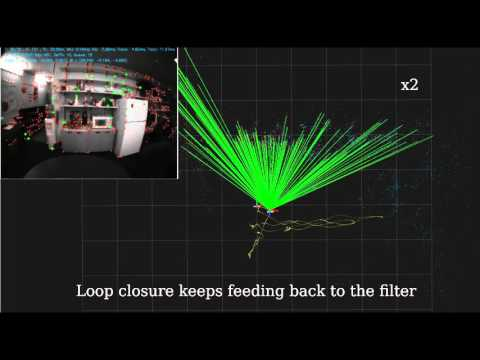

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("oQKnOHGkwTI", width=560, height=315)

## Useful resources
- [OpenCV API reference](http://docs.opencv.org/3.0-beta/index.html)
- [OpenCV Python tutorials](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)
- [OpenCV official repository](https://github.com/opencv/opencv)
- [OpenCV code samples in Python](https://github.com/opencv/opencv/tree/master/samples/python)
- [vlfeat tutorial](http://www.vlfeat.org/overview/tut.html)
- [numpy tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
- [Jupyter notebook](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
